# Warps

`nleg1d` implements warping functionality through `Warp1D` objects. A `Warp1D` object contains a single warp function, along with various attributes, properies and methods for working with that warp function. Multiple warps are stored in the `Warp1DList` class which, as the class name suggests, is simply a custom list containing `Warp1D` objects.

Let's first consider a single warp object and its key functionality.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nlreg1d as nl

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<br>
<br>

## Generate and apply random warp functions

The `random_warp` function can be used to generate random warp functions as follows.

<class 'nlreg1d.warp.Warp1D'>


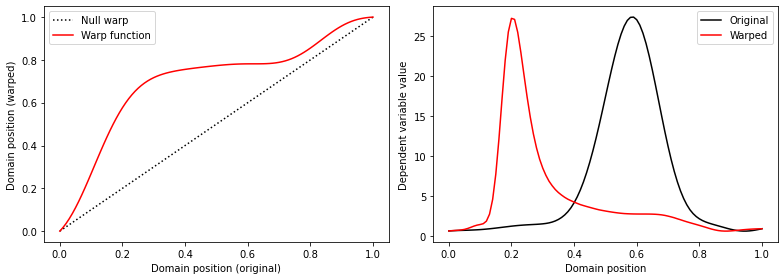

In [2]:
# load a dataset and extract a single observation (see the Datasets notebook)
dataset = nl.data.SimulatedA()
y       = dataset.dv[8]        # single DV observation

# generate a random warp:
np.random.seed(123456789)
w       = nl.random_warp( as_warp_object=True )
print( type(w) )

# apply warp:
yw      = w.apply(y)

# plot:
fig,axs = plt.subplots(1, 2, figsize=(11,4))
ax0,ax1 = axs
ax0.plot( [0,1], [0,1], color='k', ls=':', label='Null warp')
w.plot(ax=ax0, color='r', label='Warp function')
ax0.set_xlabel('Domain position (original)')
ax0.set_ylabel('Domain position (warped)')
ax0.legend()

q       = np.linspace(0, 1, y.size)
ax1.plot(q, y,  'k', label='Original')
ax1.plot(q, yw, 'r', label='Warped')
ax1.set_xlabel('Domain position')
ax1.set_ylabel('Dependent variable value')
ax1.legend()
plt.tight_layout()

plt.show()



The warp function can be accessed as an array using the `w` attribute:

<class 'numpy.ndarray'>
(101,)


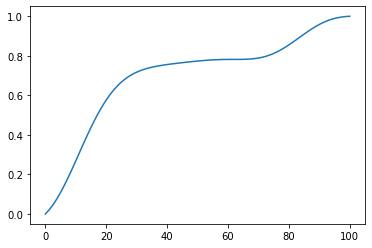

In [3]:
a    = w.w
print( type(a) )
print( a.shape )

ax   = plt.axes()
ax.plot(a)
plt.show()

<br>
<br>

## Generate and apply multiple random warps

The number (`J`) and length (`Q`) of warp functions can be adjusted as indicated below.

Note that a `Warp1DList` object is returned `J > 0` (and if `as_warp_object=True`). 


(20, 101)
<class 'nlreg1d.warp.Warp1DList'>
(20, 101)


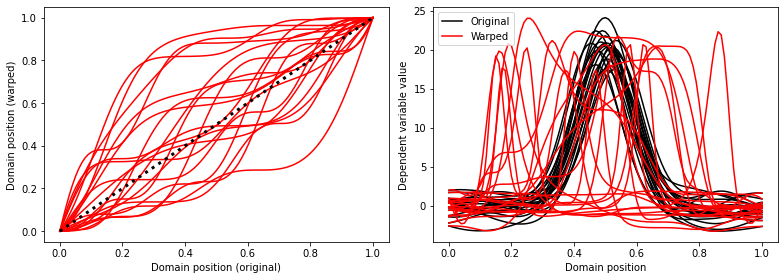

In [4]:
dataset = nl.data.SimulatedB()
y       = dataset.dv
J,Q     = y.shape
print( y.shape )


np.random.seed(123456789)
w       = nl.random_warp(J, Q, as_warp_object=True )
yw      = w.apply(y)
print( type(w) )
print( w.shape )


fig,axs = plt.subplots(1, 2, figsize=(11,4))
ax0,ax1 = axs
ax0.plot( [0,1], [0,1], color='k', ls=':', lw=3, label='Null warp', zorder=1)
w.plot(ax=ax0, color='r', label='Warp function', zorder=0)
ax0.set_xlabel('Domain position (original)')
ax0.set_ylabel('Domain position (warped)')

q       = np.linspace(0, 1, Q)
h0      = ax1.plot(q, y.T,  'k', label='Original')[0]
h1      = ax1.plot(q, yw.T, 'r', label='Warped')[1]
ax1.set_xlabel('Domain position')
ax1.set_ylabel('Dependent variable value')
ax1.legend([h0,h1], ['Original', 'Warped'])

plt.tight_layout()
plt.show()



<br>
<br>

## Adjust random warp parameters

`nlreg1d`'s random warp generator is a simple wrapper to [skfda.datasets.make_random_warping](https://fda.readthedocs.io/en/latest/modules/autosummary/skfda.datasets.make_random_warping.html). Three parameters control warp amplitude, shape and smoothness:

- `sigma` (float) – variance (default: 1.0)
- `shape_parameter` (positive float) – related to overall smoothness (default: 50.0)
- `n_random` (int) - number of random sine/cosine processes, related to local roughness (default: 5)

Let's look at the effects of these parameters by varying one at a time.




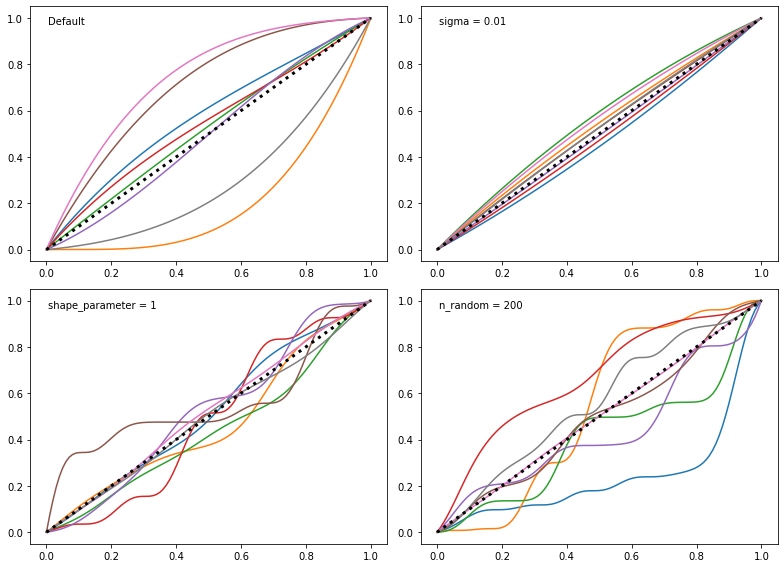

In [5]:
w0 = nl.random_warp(J=8, Q=101, sigma=1,    shape_parameter=50,  n_random=5,   as_warp_object=True)
w1 = nl.random_warp(J=8, Q=101, sigma=0.01, shape_parameter=50,  n_random=5,   as_warp_object=True)
w2 = nl.random_warp(J=8, Q=101, sigma=1,    shape_parameter=1,   n_random=5,   as_warp_object=True)
w3 = nl.random_warp(J=8, Q=101, sigma=1,    shape_parameter=50,  n_random=200, as_warp_object=True)


fig,axs = plt.subplots(2, 2, figsize=(11,8))
labels  = [ 'Default', 'sigma = 0.01', 'shape_parameter = 1', 'n_random = 200' ]
for ax,w,label in zip( axs.ravel(), [w0,w1,w2,w3], labels):
    ax.plot( [0,1], [0,1], color='k', ls=':', lw=3, label='Null warp', zorder=1)
    w.plot(ax=ax, zorder=0)
    ax.text(0.05, 0.93, label, transform=ax.transAxes)
plt.tight_layout()
plt.show()

<br>
<br>

## Calculate and apply inverse warp functions

Warp function inverses can be calculated using the `get_inverse` method as shown below.

Note: applying an inverse warp to a warped observation yields the original observation; there may be some slight numerical discrepancies due to interpolation limitations, especially when `Q` is small and/or the warp magnnitudes are large.

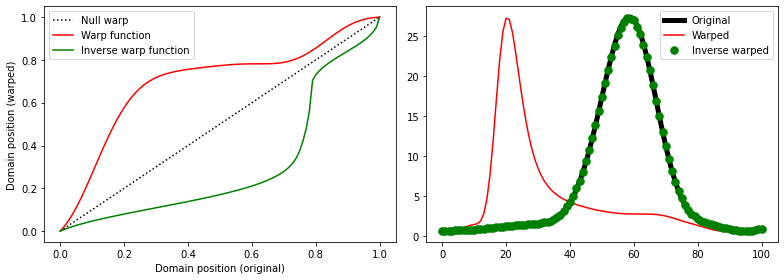

In [6]:
np.random.seed(123456789)
w       = nl.random_warp( as_warp_object=True )
wi      = w.get_inverse( as_warp_object=True )

dataset = nl.data.SimulatedA()
y       = dataset.dv[8]        # single DV observation
yw      = w.apply(y)
ywi     = wi.apply( yw )


# plot:
fig,axs = plt.subplots(1, 2, figsize=(11,4))
ax0,ax1 = axs
ax0.plot( [0,1], [0,1], color='k', ls=':', label='Null warp')
w.plot(ax=ax0,  color='r', label='Warp function')
wi.plot(ax=ax0, color='g', label='Inverse warp function')
ax0.set_xlabel('Domain position (original)')
ax0.set_ylabel('Domain position (warped)')
ax0.legend()

ax1.plot(y,   'k', label='Original', lw=5)
ax1.plot(yw,  'r', label='Warped')
ax1.plot(ywi, 'g.', label='Inverse warped', ms=15)
ax1.legend()
plt.tight_layout()

plt.show()


<br>
<br>

## Alternative warp function expressions

Two alternative expressions of warp functions are available:

- Deviation (from linear time)
- Displacement field (domain point displacements)

These can be obtained using the `get_deviation_from_linear_time` or `get_displacement_field` methods as follows:

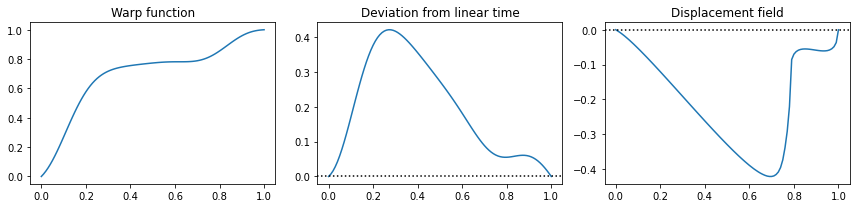

In [7]:
np.random.seed(123456789)
w   = nl.random_warp( as_warp_object=True )
d0  = w.get_deviation_from_linear_time()
d1  = w.get_displacement_field()


# plot:
fig,axs     = plt.subplots(1, 3, figsize=(12,3))
ax0,ax1,ax2 = axs
q           = np.linspace(0, 1, w.Q)
w.plot(ax=ax0)
ax1.plot( q, d0 )
ax2.plot( q, d1 )
[ax.axhline(0, color='k', ls=':')  for ax in axs[1:]]
labels = ['Warp function', 'Deviation from linear time', 'Displacement field']
[ax.set_title(s)  for ax,s in zip(axs, labels)]

plt.tight_layout()
plt.show()

Displacement values can be readily interpreted as the distance a domain point travels. The figure below emphasizes this interpretation:

- The location of the maximum function value is `qq=0.59`, as seen in the right panel
- At this point, the displacement field has a value of `-0.384`, as seen in the left panel
- Thus the location of the post-warp function maximum is `-0.384` from its original position, as seen in the right panel


-0.3840112712523059


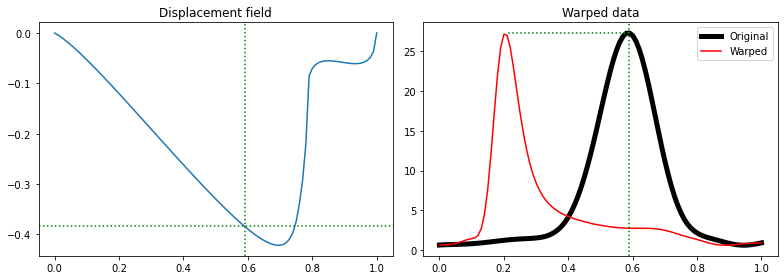

In [8]:
fig,axs = plt.subplots(1, 2, figsize=(11,4))
ax0,ax1 = axs

ax0.plot( q, d1 )
ax0.set_title('Displacement field')

ax1.plot(q, y,   'k', label='Original', lw=5)
ax1.plot(q, yw,  'r', label='Warped')
ax0.set_title('Displacement field')
ax1.legend()

# highlight a single point:
qq  = 0.59                    # an arbitrary domain position
ind = int( (y.size-1) * qq )  # array index
dt  = d1[ind]                 # displacement
print( dt )

[ax.axvline(qq, color='g', ls=':')  for ax in axs]
ax0.axhline(dt, color='g', ls=':')
# ax1.plot([0.59-0.38,0.59], [28, 28], 'g:')
ax1.plot([qq,qq+dt], [y[ind]]*2, 'g:')
ax1.set_title('Warped data')

plt.tight_layout()
plt.show()

Last, note that all "deviation" and "displacement" representations can be calculated from a `Warp1DList` object using the same method names, as follows:

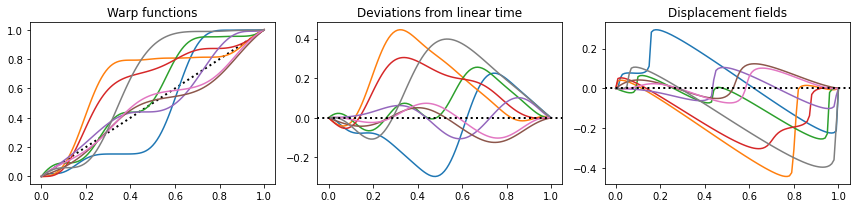

In [9]:
np.random.seed(123456789)
w   = nl.random_warp(8, 101, as_warp_object=True )
d0  = w.get_deviation_from_linear_time()
d1  = w.get_displacement_field()


# plot:
fig,axs     = plt.subplots(1, 3, figsize=(12,3))
ax0,ax1,ax2 = axs
q           = np.linspace(0, 1, w.Q)
w.plot(ax=ax0)
ax1.plot( q, d0.T )
ax2.plot( q, d1.T )

ax0.plot([0,1],[0,1], 'k:', lw=2, zorder=1)
[ax.axhline(0, color='k', ls=':', lw=2)  for ax in axs[1:]]

labels = ['Warp functions', 'Deviations from linear time', 'Displacement fields']
[ax.set_title(s)  for ax,s in zip(axs, labels)]

plt.tight_layout()
plt.show()